# Análise Exploratória de Dados
Os dados utilizados na análise a seguir foram obtidos de diferentes bases de dados, antes de utilizá-los foi necessário realizar a sua manipulação e limpeza.

Os dados de vazão e carga foram obtidos do ONS, e o PLD da CCEE.
A intenção é exemplificar uma análise de dados voltada para o setor de energia elétrica através de variáveis que são importantes para este setor.

As três variáveis são do mesmo subsistema elétrico, sendo que a vazão é do reservatório de uma usina hidrelétrica que pertence a esse subsistema.

## Importação das Bibliotecas

In [18]:
# Manipulação dos dados
import pandas as pd
import numpy as np
from datetime import datetime, time, date, timedelta

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy import stats

## Importação dos Dados

In [5]:
# DataFrame Único
df = pd.read_excel("df.xlsx")
df.head()

,data,vazao,carga,PLD
0,2018-08-08 00:00:00,121,9353,505.18
1,2018-08-08 01:00:00,121,8686,505.18
2,2018-08-08 02:00:00,121,8352,505.18
3,2018-08-08 03:00:00,121,8247,505.18
4,2018-08-08 04:00:00,121,8337,505.18


In [6]:
# Criar uma coluna com datas e agrupar em diferentes escalas de tempo

df["mes"] = df["data"].apply(lambda x: x.month) # Uma coluna para o mês
df["ano"] = df["data"].apply(lambda x: x.year) # Uma coluna para o ano

# Recriar o indice com a coluna da data, como era inicialmente
df = df.set_index("data")
df.head()

,vazao,carga,PLD,mes,ano
data,,,,,
2018-08-08 00:00:00,121,9353,505.18,8,2018
2018-08-08 01:00:00,121,8686,505.18,8,2018
2018-08-08 02:00:00,121,8352,505.18,8,2018
2018-08-08 03:00:00,121,8247,505.18,8,2018
2018-08-08 04:00:00,121,8337,505.18,8,2018


## Análise Exploratória dos Dados

### Estatísticas Descritivas

In [26]:
def solve_stats(data):
        tamanho = len(data)
        media = np.mean(data)
        #moda = stats.mode(data)
        q1 = np.percentile(data, 25)
        q2 = np.percentile(data, 50)
        q3 = np.percentile(data, 75)
        maximo = np.max(data)
        minimo = np.min(data)
        amplitude = maximo - minimo
        variancia = np.var(data)
        desvio_padrao = np.std(data)
        coef_variacao = media / desvio_padrao
        assimetria = stats.skew(data)

        return {
            'Tamanho': tamanho,
            'Média': media,
            #'Moda': moda,
            'Primeiro Quartil': q1,
            'Segundo Quartil': q2,
            'Terceiro Quartil': q3,
            'Máximo': maximo,
            'Mínimo': minimo,
            'Amplitude': amplitude,
            'Variância': variancia,
            'Desvio Padrão': desvio_padrao,
            'Coeficiente de Variação': coef_variacao,
            'Assimetria': assimetria
        }

resultado_vazao = solve_stats(df["vazao"])
resultado_carga = solve_stats(df["carga"])
resultado_pld = solve_stats(df["PLD"])
print(f"Vazao: {resultado_vazao}")
print(f"Carga: {resultado_carga}")
print(f"PLD: {resultado_pld}")

Vazao: {'Tamanho': 42912, 'Média': 520.7304250559284, 'Primeiro Quartil': 200.0, 'Segundo Quartil': 371.0, 'Terceiro Quartil': 719.75, 'Máximo': 2764, 'Mínimo': 43, 'Amplitude': 2721, 'Variância': 192240.30876111684, 'Desvio Padrão': 438.4521738583546, 'Coeficiente de Variação': 1.1876561597894015, 'Assimetria': 1.7107867926376978}
Carga: {'Tamanho': 42912, 'Média': 11623.016428970917, 'Primeiro Quartil': 9808.0, 'Segundo Quartil': 11772.0, 'Terceiro Quartil': 13296.25, 'Máximo': 18925, 'Mínimo': 0, 'Amplitude': 18925, 'Variância': 5126985.738334675, 'Desvio Padrão': 2264.284818289138, 'Coeficiente de Variação': 5.133195406818611, 'Assimetria': -0.003905540874111745}
PLD: {'Tamanho': 42912, 'Média': 193.2538393418937, 'Primeiro Quartil': nan, 'Segundo Quartil': nan, 'Terceiro Quartil': nan, 'Máximo': 933.67, 'Mínimo': 39.68, 'Amplitude': 893.99, 'Variância': 27085.598610700483, 'Desvio Padrão': 164.57702941389022, 'Coeficiente de Variação': 1.1742455191355106, 'Assimetria': nan}


Outra forma mais simples utilizando uma função nativa no Python.

In [29]:
df.drop(['mes', 'ano'], axis=1).describe()

,vazao,carga,PLD
count,42912.000000,42912.000000,42911.000000
mean,520.730425,11623.016429,193.253839
std,438.457283,2264.311202,164.578947
min,43.000000,0.000000,39.680000
25%,200.000000,9808.000000,65.150000
50%,371.000000,11772.000000,118.520000
75%,719.750000,13296.250000,273.800000
max,2764.000000,18925.000000,933.670000


### Análise de Sazonalidade

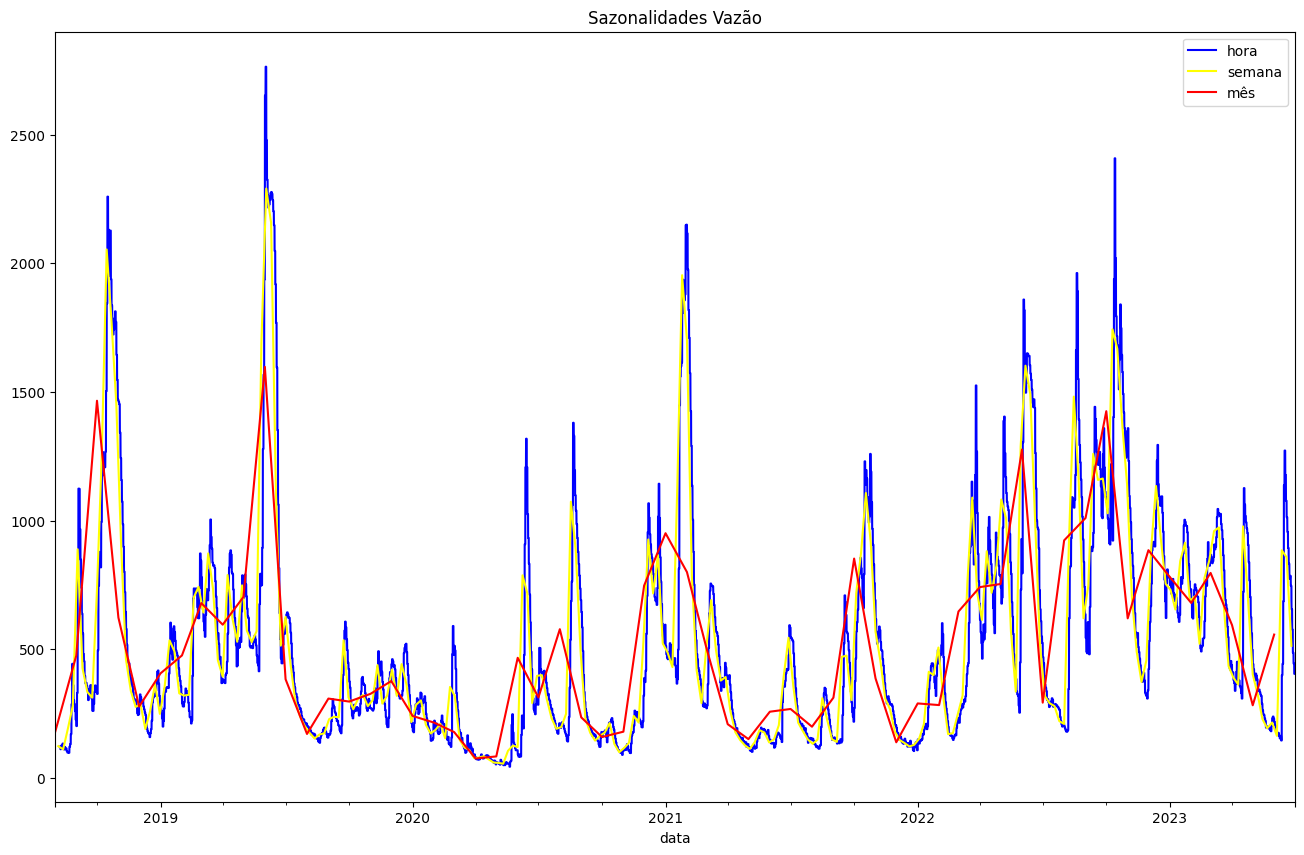

In [7]:
# Dados de Vazão
fig,ax = plt.subplots()
fig.set_size_inches(16, 10)
df['vazao'].plot(ax=ax, label='hora', color='blue')
df['vazao'].resample('W').mean().plot(ax=ax, label='semana', color='yellow')
df['vazao'].resample('M').mean().plot(ax=ax, label='mês', color='red')
plt.title('Sazonalidades Vazão')
plt.legend();

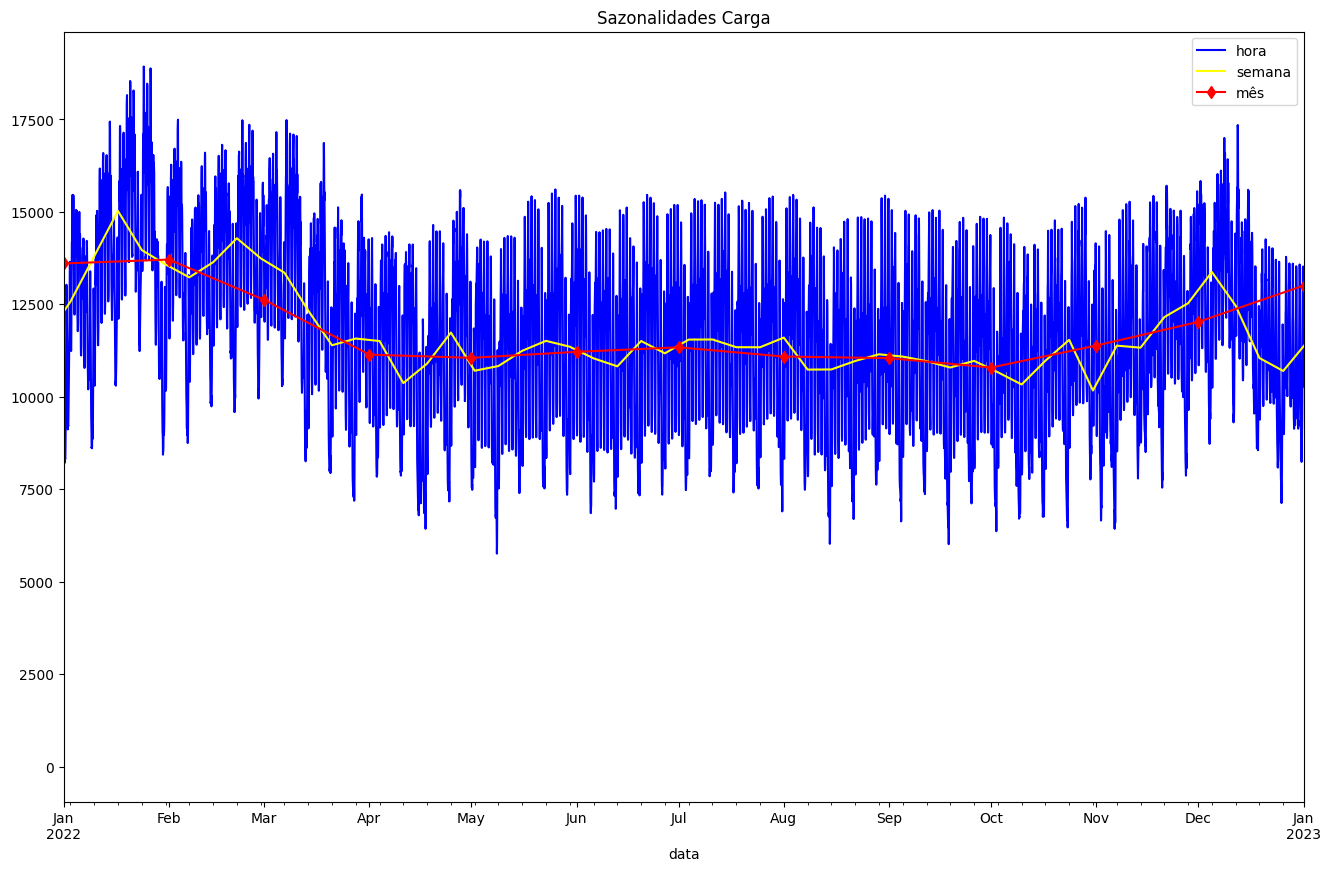

In [8]:
# Dados de Carga
fig,ax = plt.subplots()
fig.set_size_inches(16, 10)
df['carga'].plot(ax=ax, label='hora', color='blue')
df['carga'].resample('W').mean().plot(ax=ax, label='semana', color='yellow')
df['carga'].resample('M').mean().plot(ax=ax, label='mês', marker='d', color='red')
plt.xlim('2022-01-01 00:00:00', '2023-01-01 00:00:00')  # Aperfeiçoar a identificação do intervalo com dados sem NaN automaticamente.
plt.title('Sazonalidades Carga')
plt.legend()

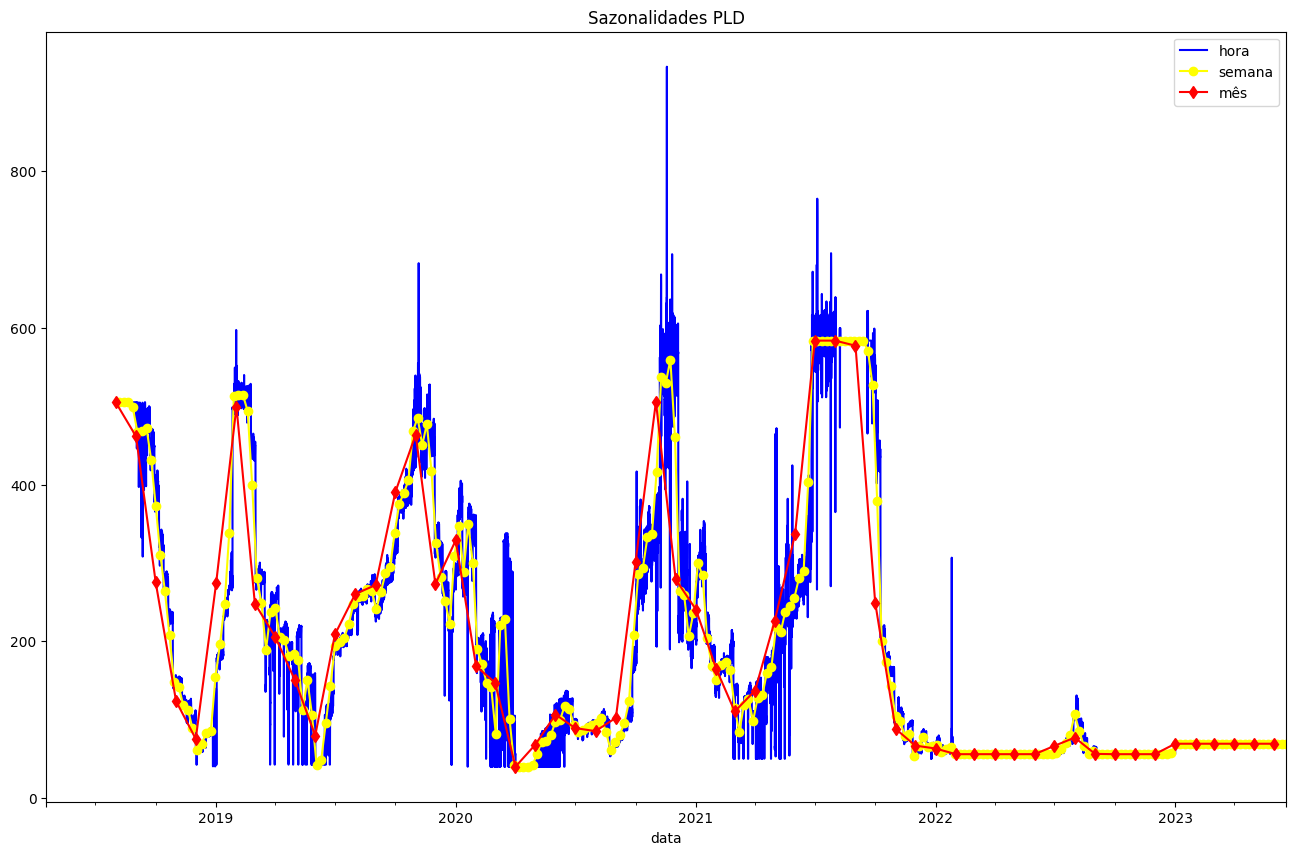

In [9]:
# Dados de PLD
fig,ax = plt.subplots()
fig.set_size_inches(16, 10)
df['PLD'].plot(ax=ax, label='hora', color='blue')
df['PLD'].resample('W').mean().plot(ax=ax, label='semana', marker='o', color='yellow')
df['PLD'].resample('M').mean().plot(ax=ax, label='mês', marker='d', color='red')
plt.xlim('2018-04-17 00:00:00', '2023-06-18 23:59:59')  # Aperfeiçoar a identificação do intervalo com dados sem NaN automaticamente.
plt.title('Sazonalidades PLD')
plt.legend()

### Box-Plots

<Axes: xlabel='mes', ylabel='PLD'>

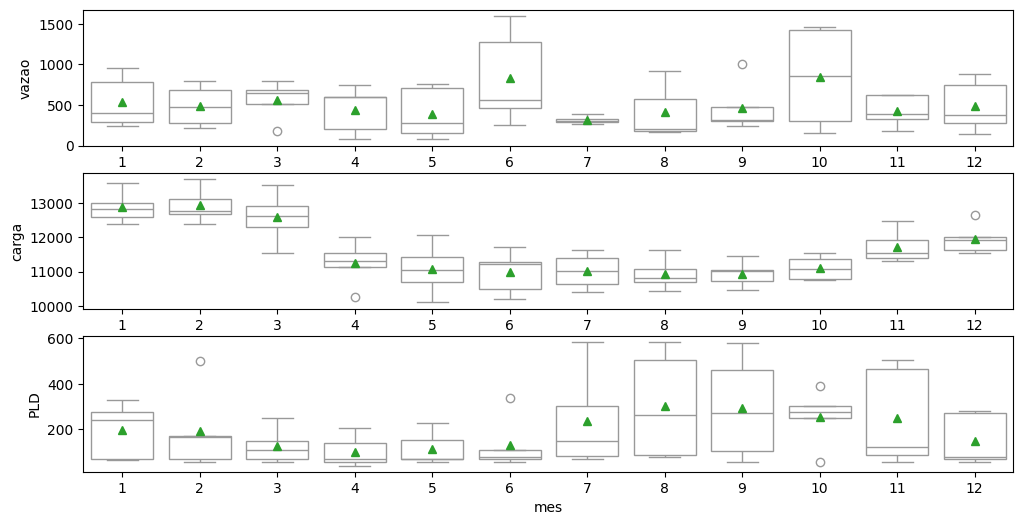

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,6))
# Plot do acumulado mensal ao longo dos anos para a base de dados de vazão
sns.boxplot(ax=ax[0], data = df, x='mes' , y = df['vazao'].resample('M').mean(),
                 color='w', showmeans=True)
# Plot do acumulado mensal ao longo dos anos para a base de dados de carga
sns.boxplot(ax=ax[1], data = df, x='mes', y = df['carga'].resample('M').mean(),
            color='w', showmeans=True)
# Plot do acumulado mensal ao longo dos anos para a base de dados de PLD
sns.boxplot(ax=ax[2], data = df, x='mes', y = df['PLD'].resample('M').mean(),
            color='w', showmeans=True)

### Histograma & Violin-*Plot*

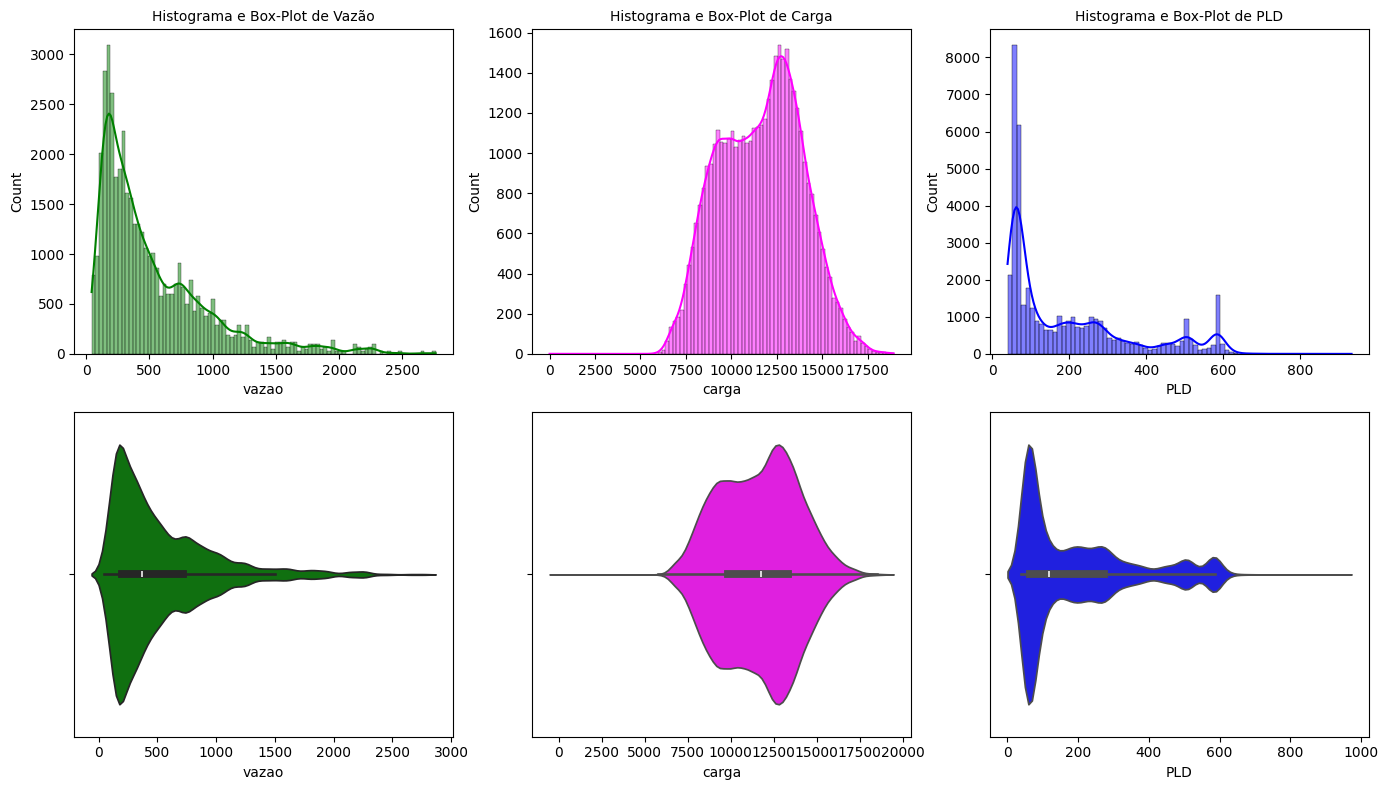

In [11]:
# Figura
plt.figure(figsize=(14, 8))

# Subplots com histogramas
plt.subplot(231)
sns.histplot(df['vazao'], kde=True, color="green")
plt.title('Histograma e Box-Plot de Vazão', fontsize=10)

plt.subplot(232)
sns.histplot(df['carga'], kde=True, color="magenta")
plt.title('Histograma e Box-Plot de Carga', fontsize=10)

plt.subplot(233)
sns.histplot(df['PLD'], kde=True, color="blue")
plt.title('Histograma e Box-Plot de PLD', fontsize=10)

# Subplots com boxplots
plt.subplot(234)
sns.violinplot(df['vazao'], orient="h", color="green")

plt.subplot(235)
sns.violinplot(df['carga'], orient="h", color="magenta")

plt.subplot(236)
sns.violinplot(df['PLD'], orient="h", color="blue")

plt.tight_layout()  # Para melhorar o espaçamento entre as subplots
plt.show()

### Gráfico de Dispersão 3D

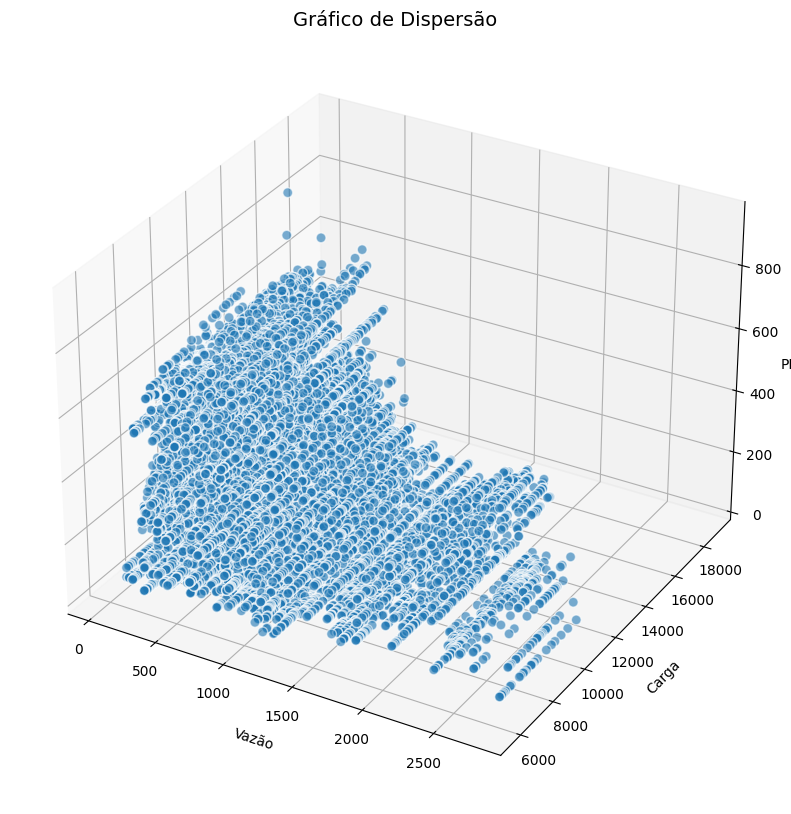

In [30]:
# Projeção 3D

# Tamanho da figura
fig = plt.figure(figsize = (10, 10))

# Subplots
ax = fig.add_subplot(111, projection = '3d')

# Dimensões
xs = df['vazao']
ys = df['carga']
zs = df['PLD']

# Gráfico de pontos
ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w')

# Labels
ax.set_xlabel('\nVazão')
ax.set_ylabel('\nCarga')
ax.set_zlabel('\nPLD')

# Título
plt.title("Gráfico de Dispersão", fontsize = 14)

# Mostra o gráfico
plt.show()

### Correlação dos Dados

In [27]:
df_copy = df.copy()
df_copy.drop(['mes', 'ano'], axis = 1).corr("spearman")

,vazao,carga,PLD
vazao,1.000000,-0.024225,-0.250165
carga,-0.024225,1.000000,0.067180
PLD,-0.250165,0.067180,1.000000


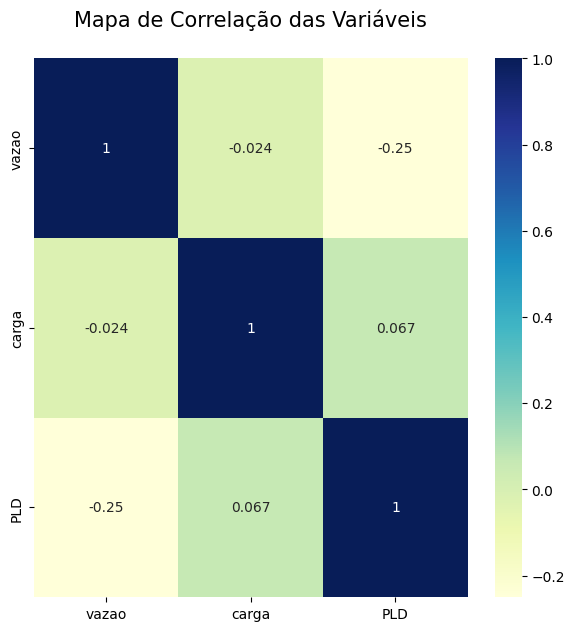

In [28]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_copy.drop(['mes', 'ano'], axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis\n", fontsize = 15)
plt.show()